# K最近傍回帰

In [19]:
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import preprocesses
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
import numpy as np

In [20]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])
y=new_train[["SalePrice"]]
X=new_train.drop(["SalePrice"], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=2020)

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [22]:
RMSE=[]
r2_scores=[]
testRMSE=[]
for k in range(1,50):
    print(k,end=" ")
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, X_train, y_train, 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))
    mdl=Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
    mdl.fit(X_train, y_train)
    testRMSE.append(np.sqrt(mean_squared_error(y_valid['SalePrice'], mdl.predict(X_valid))))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [23]:
print(RMSE[0:30])
print(r2_scores[0:30])
print(np.min(RMSE))
print(RMSE.index(np.min(RMSE)))#9で最小

[0.2807054023222318, 0.2446984593283032, 0.2371527542487873, 0.2339634993877675, 0.2317397939691018, 0.23295287287156646, 0.23143308715199248, 0.23185046509569177, 0.23100434108480694, 0.23088698501335264, 0.23169298756814596, 0.23480593382298673, 0.23673550237339672, 0.23781660764281234, 0.23850581834298173, 0.23926421673498813, 0.24043862295229587, 0.2422580771740255, 0.2436441728810819, 0.24523386467153824, 0.24669522228195867, 0.24712553904973175, 0.2482690941528982, 0.24928784490019704, 0.25065173534059365, 0.25217503202362473, 0.2532727844345027, 0.254779921263833, 0.25610454007165717, 0.25765733655696305]
[0.48551373349752824, 0.6108772279124765, 0.6362737783257083, 0.6463839680106347, 0.6539490774151849, 0.6498332070505184, 0.6551809062515576, 0.654405211263871, 0.6569898560611883, 0.6576639563485355, 0.6555219445116295, 0.6463704783127233, 0.6405544211722631, 0.6376122051719173, 0.6355997477596648, 0.6331037282519547, 0.6295881325091358, 0.6239362293440462, 0.6193265366751879,

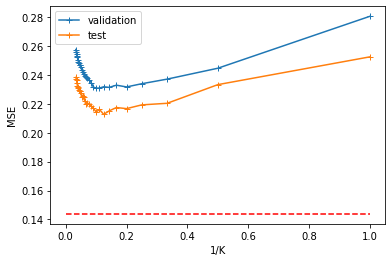

In [24]:
plt.plot(1/np.array(range(1,31)),RMSE[0:30],"+-",label="validation")
plt.plot(1/np.array(range(1,31)),testRMSE[0:30],"+-",label="test")
plt.legend()
plt.hlines([0.143781980986776], 0,1, "red", linestyles='dashed')
plt.xlabel("1/K")
plt.ylabel("MSE")
plt.show()

### 次元を減らしてみる
K-meansでは次元の呪い(curse of dimensionally)が起こっていそうなので、
次元を減らしてみる。<BR>
 LinearRegressionにおいてforward selectionを行い、説明変数を5,10,15,20,25,30,35,40個取り出して結果を比べてみた。

In [25]:
new_train_valiable_list5=['OverallQual', 'OverallCond', '1stFlrSF', 'GarageCars', 'Baths']
new_train_valiable_list10=['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinType1', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'FireplaceQu', 'GarageCars', 'Baths']
new_train_valiable_list15=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'ScreenPorch', 'Baths']
new_train_valiable_list20=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC', 'Baths']
new_train_valiable_list25=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Baths']
new_train_valiable_list30=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list35=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'YrSold', 'Baths']
new_train_valiable_list40=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'YrSold', 'Baths']

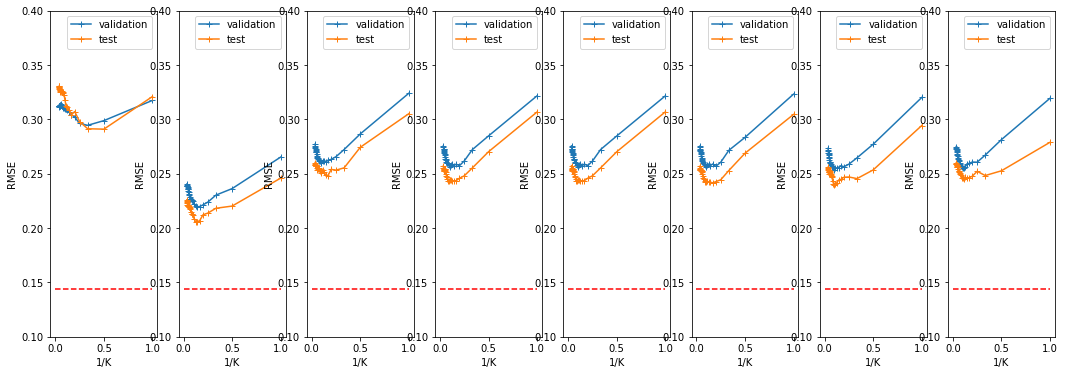

In [26]:
cnt=0
plt.figure(figsize=(18,6))
for valiables in [new_train_valiable_list5,new_train_valiable_list10,new_train_valiable_list15,new_train_valiable_list20,new_train_valiable_list25,new_train_valiable_list30,new_train_valiable_list35,new_train_valiable_list40]:
    RMSE=[]
    r2_scores=[]
    testRMSE=[]
    N=30
    for k in range(1,N):
        model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
        k_fold = KFold(n_splits=5)
        test_MSE = cross_validate(model, X_train[valiables], y_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
        RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
        r2_scores.append(np.mean(test_MSE['test_r2']))
        mdl=Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', KNeighborsRegressor(n_neighbors=k))])
        mdl.fit(X_train[valiables], y_train)
        testRMSE.append(np.sqrt(mean_squared_error(y_valid['SalePrice'], mdl.predict(X_valid[valiables]))))
    cnt+=1
    plt.subplot(1,8,cnt)
    plt.plot(1/np.array(range(1,N)),RMSE[0:N],"+-",label="validation")
    plt.plot(1/np.array(range(1,N)),testRMSE[0:N],"+-",label="test")
    plt.legend()
    plt.hlines([0.143781980986776], 0,1, "red", linestyles='dashed')
    plt.xlabel("1/K")
    plt.ylabel("RMSE")
    plt.ylim([0.1,0.4])
plt.show()

10個の説明変数を取った時がもっともMSEが小さかった。それ以降は説明変数を多く取ってもあまりMSEは変わらなかった。
これはLinearRegressionでの結果より少ない。<BR>
説明変数の数が少ないほどK-neighborhoodはうまく働くからであると思われる。また、全てにおいてLinearRegressionの方がMSEが小さいので、予測変数とSalesPriceの間に線形に近い関係があることが多いとみなせる。(これは前処理で選択したn段階評価の説明変数について、評価が高いほどSalesPriceが高いという単純な線形関係がみられるからだと思われる。)